# Excercise Sheet 2

### Marvin Kinz, Max Kahl, Konstantin Neureither

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
from sys import getsizeof
import scipy.ndimage
import imageio
import math
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams["image.interpolation"] = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'pytorch'

## Task 1: Downsampling an image

In [84]:
def subsample(img, skip, w0=0, h0=0):
    print("Subsampling image with offset (" + str(w0) + "," + str(h0) +") and skip " + str(skip) + " ...")
    print("original img shape " + str(img.shape))
    w, h, c = img.shape
    ws = math.ceil((w-w0)/skip)
    hs = math.ceil((h-h0)/skip)

    img_subsample = np.zeros((ws, hs ,3), dtype=int)
    print("subsample img shape " + str(img_subsample.shape))

    for i in range(ws):
        for j in range(hs):
            img_subsample[i][j] = img[i*skip + w0][j*skip + h0]

    print("\n")
    return img_subsample

image sign.jpg original resolution


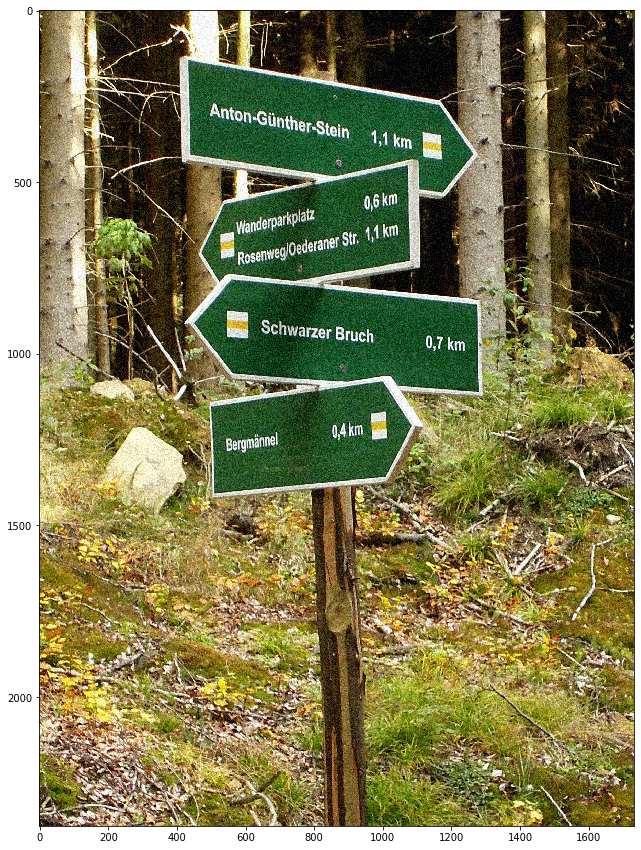

Subsampling image with offset (0,0) and skip 13 ...
original img shape (2376, 1733, 3)
subsample img shape (183, 134, 3)


sub sampled from (0,0) with skip=13


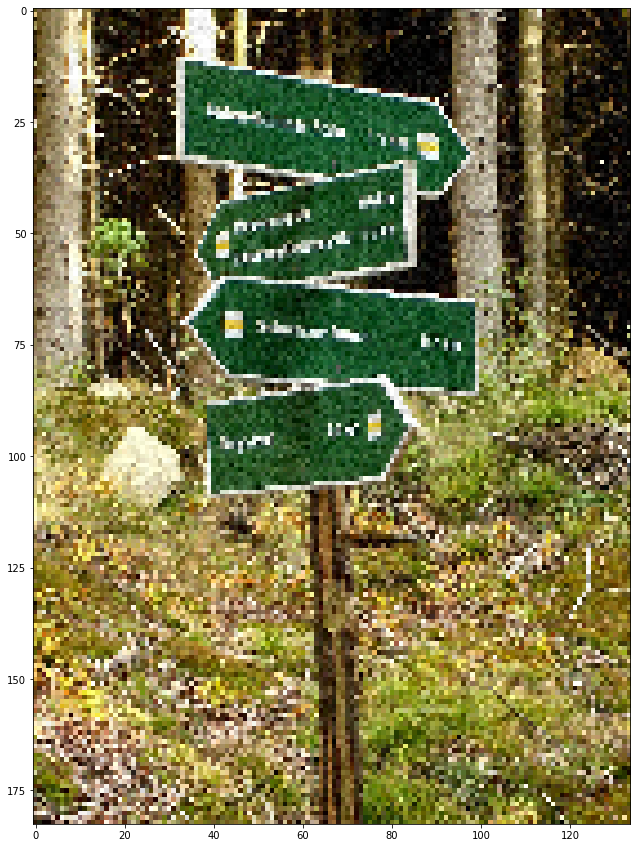

In [85]:
img = imageio.imread('data/sign.jpg',)
print('image sign.jpg original resolution')
plt.imshow(img)
plt.show()

img_subsample = subsample(img, 13)
        
print("sub sampled from (0,0) with skip=13")
plt.imshow(img_subsample)
plt.show()

Subsampling the image by a factor of 13 in each dimension leads to a heavy loss of information. The pixels look very sharp, because the values of neighbouring pixels can differ strongly. The shape of the sign and the forrest can be still recognized, but the sign cannot be read anymore. Also fine structures like sticks and stones are difficult to define in the sub sampled picture. One can however recognize the structures when comparing to the original picture.

Subsampling image with offset (4,4) and skip 13 ...
original img shape (2376, 1733, 3)
subsample img shape (183, 133, 3)


Subsampling image with offset (8,8) and skip 13 ...
original img shape (2376, 1733, 3)
subsample img shape (183, 133, 3)




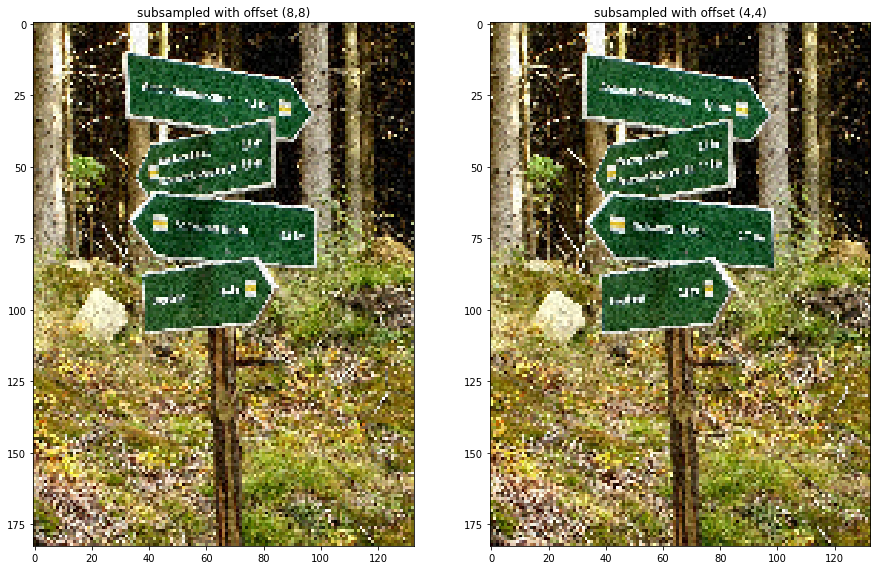

In [76]:
img_subsample2 = subsample(img, 13, 4,4)
img_subsample3 = subsample(img, 13, 8,8)

plt.subplot(1,2,1)

plt.title('subsampled with offset (8,8)')
plt.imshow(img_subsample3)

plt.subplot(1,2,2)
plt.title('subsampled with offset (4,4)')
plt.imshow(img_subsample2)

plt.show();

One can definitely observe differences between the three different subsampling approaches. While the general resolution and amount of detail is the same in all three pictures, the sign looks a little different. For (4,4) the uppermost letters show a more or less continous white line, (8,8) has a darker area at the beginning of the letters, which interrupts the line. Also it looks as if the black shadow on the signs looks darker on (4,4) than on (8,8). This might be because when choosing the offset of (4,4), more darker pixels made it into the final result. 

In [122]:
def get_box_kernel1D(scalingfactor):
    if scalingfactor % 2 == 0:
        scalingfactor+=1
    kernel = np.ones((scalingfactor), dtype=float)
    kernel = kernel / scalingfactor
    return kernel

In [123]:
box_kernel_3 = get_box_kernel1D(3)
test = [1,1,1,0,0,0,1,0,0]
conv = scipy.ndimage.convolve1d(test, box_kernel_3, axis=0, mode='constant', cval=0.0)
print('zero padding:', conv)

zero padding: [0 1 0 0 0 0 0 0 0]


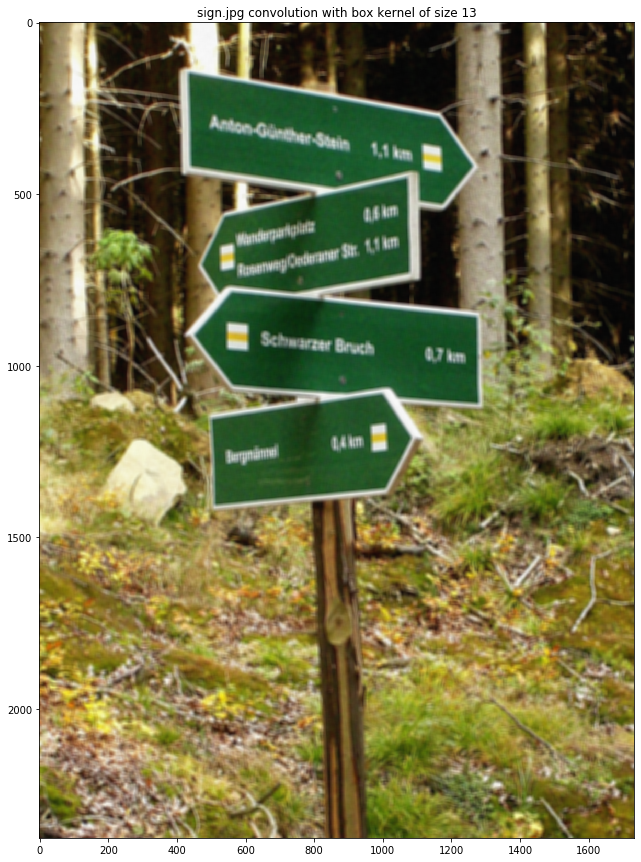

In [126]:
box_kernel_13 = get_box_kernel1D(13)
img_conv_x = scipy.ndimage.convolve1d(img, box_kernel_13, axis=0, mode='reflect')
img_conv = scipy.ndimage.convolve1d(img_conv_x, box_kernel_13, axis=1, mode='reflect')

plt.imshow(img_conv)
plt.title("sign.jpg convolution with box kernel of size 13")
plt.show();

Subsampling image with offset (0,0) and skip 13 ...
original img shape (2376, 1733, 3)
subsample img shape (183, 134, 3)




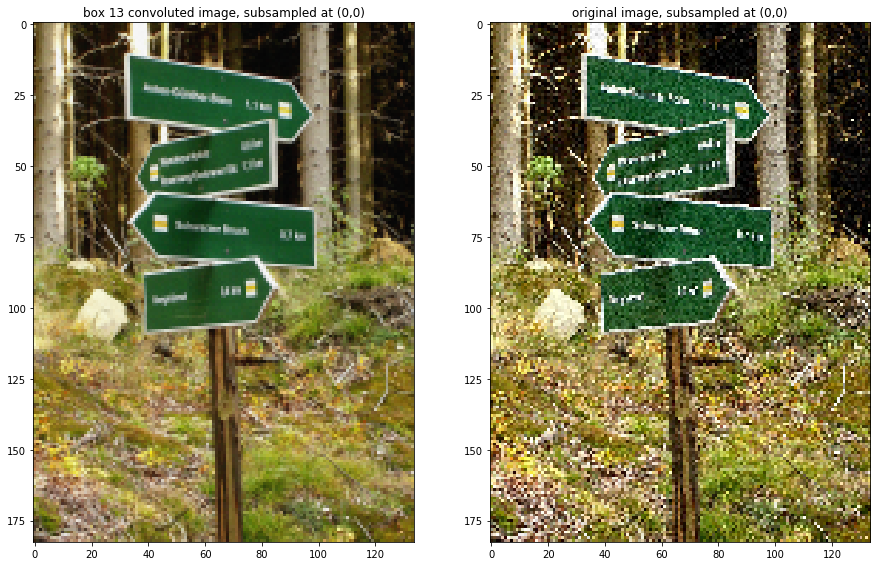

In [128]:
img_conv_sub = subsample(img_conv, 13, 0, 0)
plt.subplot(1,2,1)
plt.imshow(img_conv_sub)
plt.title("box 13 convoluted image, subsampled at (0,0)")

plt.subplot(1,2,2)
plt.imshow(img_subsample)
plt.title("original image, subsampled at (0,0)")

plt.show()

Even if the subsampling scale is exactly the same for both pictures, the one which was convoluted with the box filter first looks a lot better. The background shows more meaningful details, such as the stone, some sticks at the trees or the green hill. Also the signs look better, beacause the white lines and letters are more clear and the green background color is uniform. The box filter reduced aliasing effects for the white lines. 
By using the boxfilter, we actually included more information into the subsampled picture, because each 13th pixel we finally used, already contained information of the neighbouring 13. That is the reason, why there implicitly is more information in the convoluted image.

Subsampling image with offset (4,4) and skip 13 ...
original img shape (2376, 1733, 3)
subsample img shape (183, 133, 3)


Subsampling image with offset (8,8) and skip 13 ...
original img shape (2376, 1733, 3)
subsample img shape (183, 133, 3)




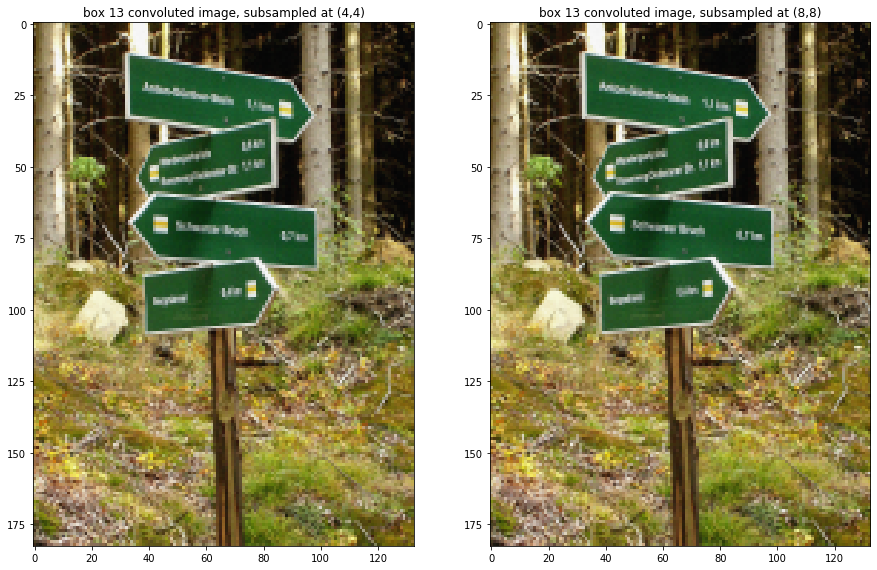

In [131]:
img_conv_sub2 = subsample(img_conv, 13, 4, 4)
img_conv_sub3 = subsample(img_conv, 13, 8, 8)

plt.subplot(1,2,1)
plt.imshow(img_conv_sub2)
plt.title("box 13 convoluted image, subsampled at (4,4)")

plt.subplot(1,2,2)
plt.imshow(img_conv_sub3)
plt.title("box 13 convoluted image, subsampled at (8,8)")

plt.show()

In contrary to the non-convoluted images one cannot really tell a huge difference between these two images. There is some slight deviation, for example at the post and the brown structure of it and also in the green and for the letters, however these deviations do not change the overall result and information shown in the image. Becuase the box filter was used, the information of every pixel in the original image contributed to both results, so now we don't use two complete subsets of this information (as in the first subsampling) but just a different interpretation of the same set of information.

## e)
We do waste a lot of computation because we calculate the convolution for every pixel, while we only use every 13th pixel eventually for the subsampling. We could make the operation more efficient by only computing the convolution for every 13th pixel, which would implicitly include the downsampling operation. ```torch.nn.functional.conv1d```allows this by using the parameter ```stride```. If we set this to ```stride=13```, the filter kernel would always skip 12 pixels and only calculate the value for every 13th pixel. The result should have the same dimensions and look the same as the subsampled convolved picture starting at (0,0). 